### Correlação e Regressão
- correlação: correspondência entre variáveis -- Correlação *NÃO* é Causa
- regressão: Previsões

- Cálculo da Covariância:

$$C(x,y) =  \frac {\Sigma ({xi}-\bar{x}) * ({yi} - \bar{y})}{n - 1}$$ 

- Coeficiente de Variação

$$Cr(x,y) = \frac {Cov(x,y)}{std(x) * std(y)}$$

- Coeficiente de Determinação

$$Cd(x, y) = Cr^2$$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [3]:
dataset = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
dataset

,tamanho,preco
0,30,57000
1,39,69000
2,49,77000
3,60,90000


In [4]:
media_tamanho = dataset['tamanho'].mean()
media_preco = dataset['preco'].mean()
media_tamanho, media_preco

(44.5, 73250.0)

In [5]:
dp_tamanho = dataset['tamanho'].std()
dp_preco = dataset['preco'].std()
dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

### Correlação - cálculo manual

In [7]:
dataset['dif'] = (dataset['tamanho'] - media_tamanho) * (dataset['preco'] - media_preco)
dataset

,tamanho,preco,dif
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [8]:
soma_dif = dataset['dif'].sum()
soma_dif

535500.0

In [9]:
covariancia = soma_dif / (len(dataset) - 1)
covariancia

178500.0

In [10]:
coeficiente_correlacao = covariancia / (dp_tamanho * dp_preco)
coeficiente_correlacao

0.9962006267707775

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


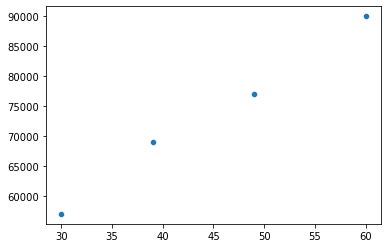

In [11]:
sns.scatterplot(tamanho, preco);

In [12]:
coeficiente_determinacao = math.pow(coeficiente_correlacao, 2)
coeficiente_determinacao

0.9924156887784898

### Cálculo com o Numpy e Pandas

In [13]:
# cálculo da covariância
np.cov(tamanho, preco)

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [14]:
# entendendo o formato do numpy
# mostra a covariância entre todos os atributos
dataset.cov()

,tamanho,preco,dif
tamanho,167.0,178500.0,1.850000e+05
preco,178500.0,192250000.0,1.612500e+08
dif,185000.0,161250000.0,1.735512e+10


In [15]:
# coeficiente de correlação
np.corrcoef(tamanho, preco)

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [16]:
dataset.corr()

,tamanho,preco,dif
tamanho,1.000000,0.996201,0.108667
preco,0.996201,1.000000,0.088278
dif,0.108667,0.088278,1.000000


In [2]:

house = pd.read_csv("..\Bases de dados\house_prices.csv")
house

house.drop(labels = ['id', 'date', 'sqft_living', 'sqft_lot'], axis = 1, inplace=True)
house.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house.cov().head(5)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.347824e+11,105286.276362,148481.495749,50908.003884,8460.643388,111772.969096,8687.030331,288026.499738,1.841014e+08,5.261406e+07,582448.362866,1.864486e+07,-1.045072e+06,15617.422517,1118.118066,1.472964e+08,8.264591e+08
bedrooms,1.052863e+05,0.865015,0.369527,0.088104,-0.000530,0.056684,0.017232,0.390254,3.678361e+02,1.247599e+02,4.212004,7.038678e+00,-7.597239e+00,-0.001151,0.016958,2.496518e+02,7.426446e+02
bathrooms,1.484815e+05,0.369527,0.593151,0.208211,0.004247,0.110800,-0.062638,0.602005,4.370876e+02,9.672443e+01,11.447333,1.569654e+01,-8.400840e+00,0.002622,0.024191,3.001611e+02,1.833182e+03
floors,5.090800e+04,0.088104,0.208211,0.291588,0.001107,0.012184,-0.092686,0.290824,2.342603e+02,-5.871985e+01,7.761250,1.374814e+00,-1.708121e+00,0.003712,0.009538,1.035866e+02,-1.661524e+02
waterfront,8.460643e+03,-0.000530,0.004247,0.001107,0.007485,0.026643,0.000938,0.008418,5.163720e+00,3.085741e+00,-0.066483,3.227949e+00,1.401912e-01,-0.000171,-0.000511,5.127103e+00,7.252979e+01


In [7]:
house.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
floors,0.256794,0.175429,0.500653,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276


C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


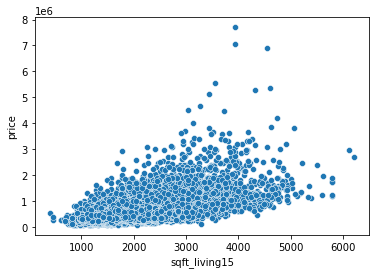

In [8]:
sns.scatterplot(house['sqft_living15'], house['price']);

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


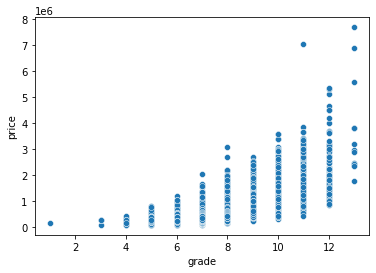

In [9]:
sns.scatterplot(house['grade'], house['price']);

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


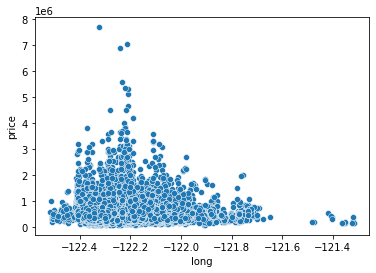

In [10]:
sns.scatterplot(house['long'], house['price']);

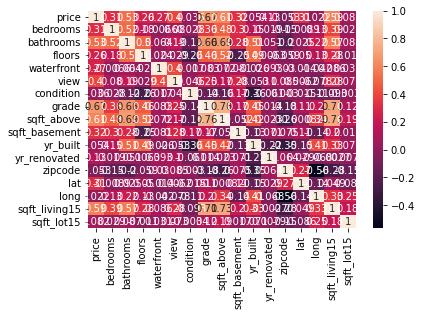

In [12]:
sns.heatmap(house.corr(), annot=True);

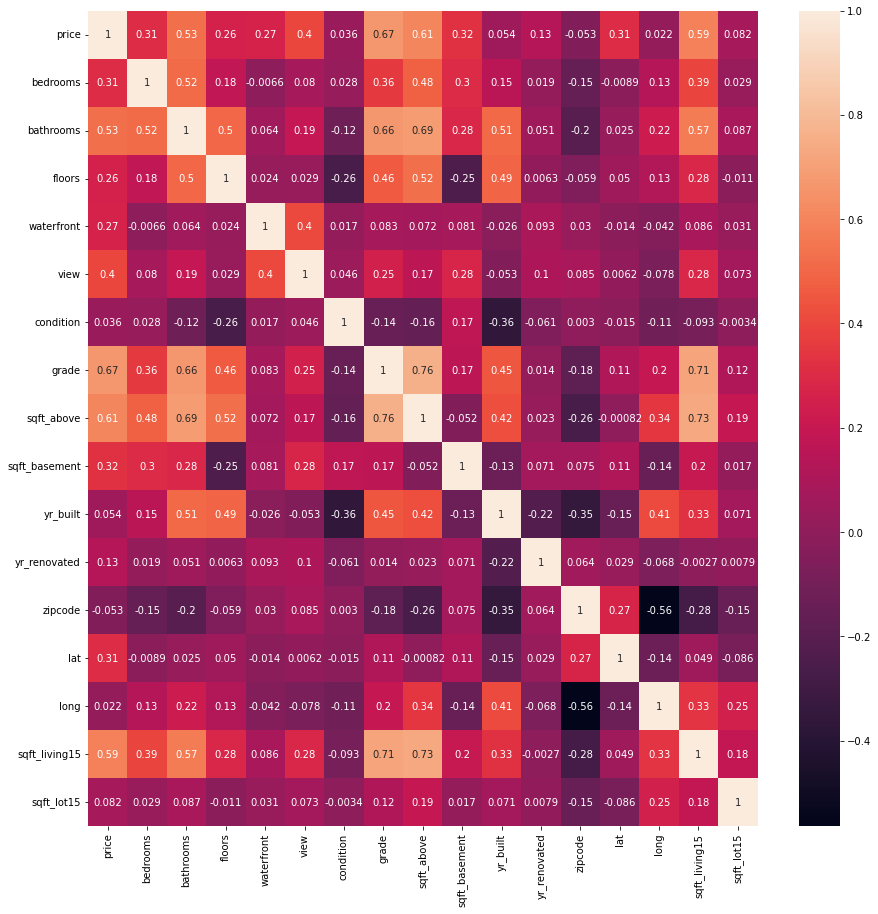

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(house.corr(), annot=True);

### Biblioteca Yellowbrick

In [14]:
!pip install yellowbrick --upgrade

In [20]:
from yellowbrick.target import FeatureCorrelation

In [21]:
# retiramos o preço do retorno da função
house.columns[1:]

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

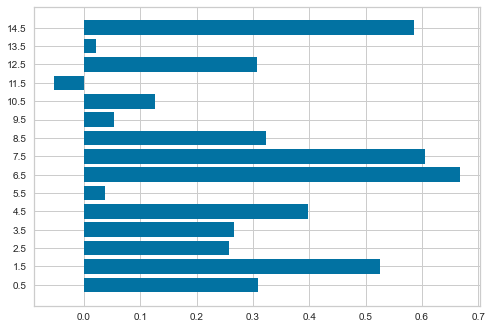

In [23]:
grafico = FeatureCorrelation(labels = house.columns[1:])
grafico.fit(house.iloc[:, 1:16].values, house.iloc[:, 0].values)
grafico.show();